In [132]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
# Define reward matrices
baseline_reward_matrix = np.array([[5, 3], [1, 0]])
in_group_reward_matrix = np.array([[4, 3], [1, 0]])
out_group_reward_matrix = np.array([[7, 5], [1, 0]])

In [128]:
# Define agent class and simulation function
class Agent:
    def __init__(self, group, coop_prob):
        self.group = group
        self.coop_prob = coop_prob
        self.total_reward = 0

In [129]:
def select_pairs(agents):
    pairs = []
    available_agents = list(agents)  # Convert set to list
    
    while len(pairs) < len(agents) // 2 and len(available_agents) >= 2:
        agent1, agent2 = random.sample(available_agents, 2)
        if agent1 != agent2:  # Ensure the same agent isn't paired with itself
            pairs.append((agent1, agent2))
            available_agents.remove(agent1)
            available_agents.remove(agent2)
    
    return pairs

def simulate(agents, reward_matrix, iterations=100, in_group_prob=0.7, out_group_prob=0.3):
    for _ in range(iterations):
        pairs = select_pairs(agents)
        for agent1, agent2 in pairs:
            agent1_cooperates = np.random.rand() < agent1.coop_prob
            agent2_cooperates = np.random.rand() < agent2.coop_prob
            
            if agent1_cooperates and agent2_cooperates:
                reward = reward_matrix[0, 0]  # both cooperate
            elif agent1_cooperates and not agent2_cooperates:
                reward = reward_matrix[0, 1]  # agent1 cooperates, agent2 does not
            elif not agent1_cooperates and agent2_cooperates:
                reward = reward_matrix[1, 0]  # agent1 does not cooperate, agent2 cooperates
            else:
                reward = reward_matrix[1, 1]  # both do not cooperate
            
            agent1.total_reward += reward
            agent2.total_reward += reward

In [130]:
# Create agents for each condition
agents_baseline = [Agent(group='none', coop_prob=0.5) for _ in range(10)]
agents_compare = [Agent(group='in_group', coop_prob=0.7) for _ in range(5)] + [Agent(group='out_group', coop_prob=0.3) for _ in range(5)]
agents_in_group = [Agent(group='in_group', coop_prob=0.7) for _ in range(5)] + [Agent(group='out_group', coop_prob=0.3) for _ in range(5)]
agents_out_group = [Agent(group='out_group', coop_prob=0.3) for _ in range(5)] + [Agent(group='in_group', coop_prob=0.7) for _ in range(5)]

# Run simulations
simulate(agents_baseline, baseline_reward_matrix)
simulate(agents_compare, in_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)
simulate(agents_in_group, in_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)
simulate(agents_out_group, out_group_reward_matrix, in_group_prob=0.7, out_group_prob=0.3)

# Collect results
baseline_rewards = [agent.total_reward for agent in agents_baseline]
baseline_compare = [agent.total_reward for agent in agents_baseline]
in_group_rewards = [agent.total_reward for agent in agents_in_group]
out_group_rewards = [agent.total_reward for agent in agents_out_group]

0 with none vs 6 with none
2 with none vs 7 with none
3 with none vs 5 with none
8 with none vs 4 with none
1 with none vs 9 with none
3 with none vs 4 with none
2 with none vs 6 with none
8 with none vs 5 with none
1 with none vs 7 with none
9 with none vs 0 with none
1 with none vs 8 with none
5 with none vs 7 with none
3 with none vs 6 with none
0 with none vs 9 with none
4 with none vs 2 with none
0 with none vs 7 with none
1 with none vs 8 with none
6 with none vs 5 with none
2 with none vs 3 with none
4 with none vs 9 with none
0 with none vs 7 with none
5 with none vs 2 with none
3 with none vs 6 with none
4 with none vs 9 with none
1 with none vs 8 with none
5 with none vs 2 with none
3 with none vs 4 with none
6 with none vs 9 with none
0 with none vs 1 with none
7 with none vs 8 with none
8 with none vs 1 with none
6 with none vs 4 with none
9 with none vs 0 with none
3 with none vs 5 with none
2 with none vs 7 with none
3 with none vs 2 with none
6 with none vs 8 with none
0

In [131]:
results_df = pd.DataFrame({
    'Baseline': baseline_rewards,
    'Comparison': baseline_compare,
    'In-group': in_group_rewards,
    'Out-group': out_group_rewards
})

# Display the DataFrame
print("Simulation Results")
print(results_df.describe())
print(results_df)

Simulation Results
         Baseline  Comparison    In-group   Out-group
count   10.000000   10.000000   10.000000   10.000000
mean   235.400000  235.400000  206.600000  320.400000
std     16.263114   16.263114   35.465789   68.997907
min    216.000000  216.000000  164.000000  211.000000
25%    221.250000  221.250000  181.500000  259.500000
50%    231.500000  231.500000  197.500000  332.000000
75%    249.250000  249.250000  235.250000  379.500000
max    260.000000  260.000000  263.000000  404.000000
   Baseline  Comparison  In-group  Out-group
0       260         260       263        307
1       256         256       238        211
2       225         225       207        251
3       234         234       227        254
4       220         220       248        276
5       244         244       186        378
6       251         251       165        386
7       229         229       188        357
8       219         219       180        404
9       216         216       164        380


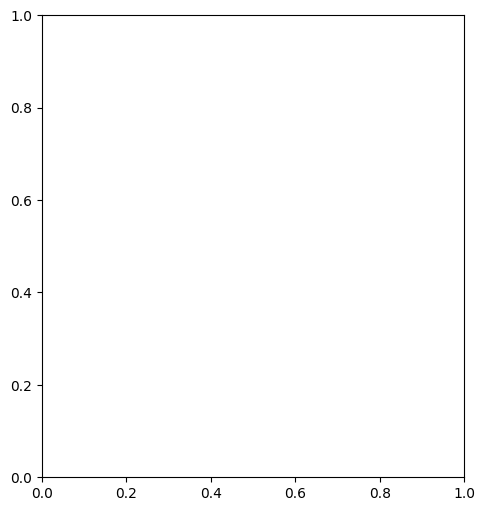

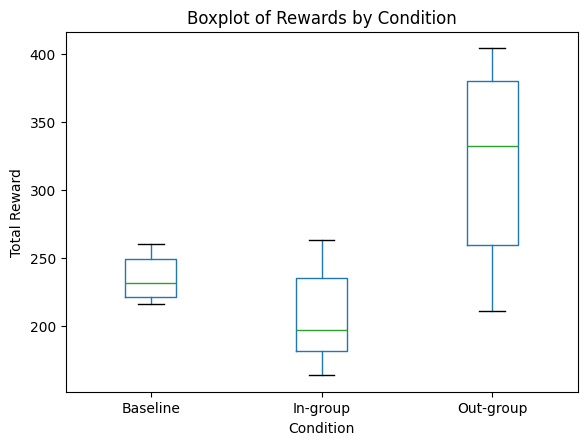

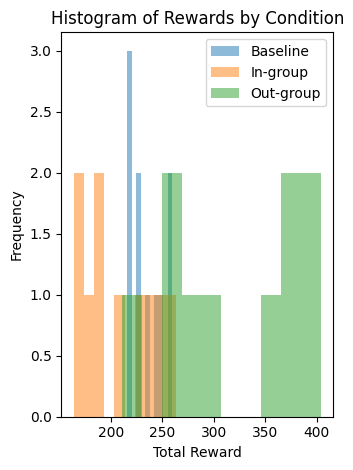

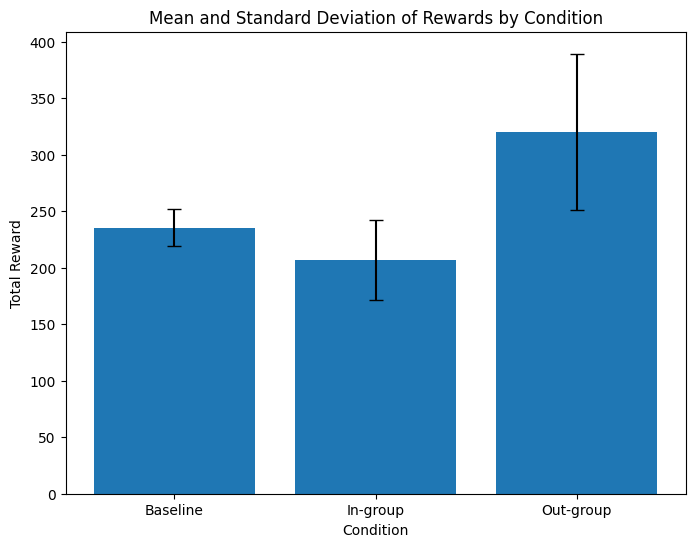

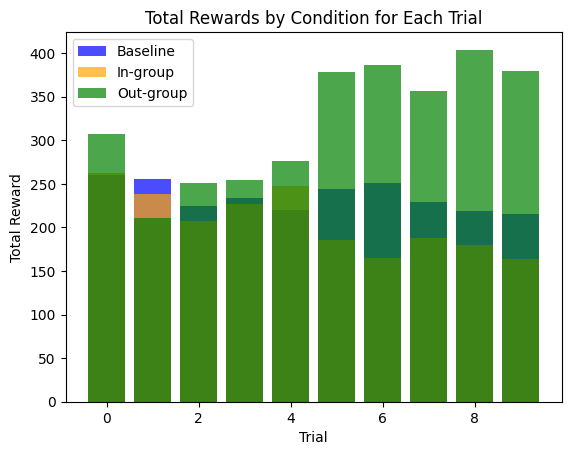

In [135]:
# Create a DataFrame for easy plotting
df = pd.DataFrame({
    'Condition': ['Baseline'] * len(baseline_rewards) + ['In-group'] * len(in_group_rewards) + ['Out-group'] * len(out_group_rewards),
    'Reward': baseline_rewards + in_group_rewards + out_group_rewards
})

# Plot the distributions of rewards for each condition
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
df.boxplot(column='Reward', by='Condition', grid=False)
plt.title('Boxplot of Rewards by Condition')
plt.suptitle('')
plt.xlabel('Condition')
plt.ylabel('Total Reward')
plt.show()

# Histogram
plt.subplot(1, 2, 2)
for condition in df['Condition'].unique():
    subset = df[df['Condition'] == condition]
    plt.hist(subset['Reward'], alpha=0.5, label=condition, bins=10)

plt.title('Histogram of Rewards by Condition')
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Mean and standard deviation bar plot
summary_stats = df.groupby('Condition')['Reward'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(8, 6))
plt.bar(summary_stats['Condition'], summary_stats['mean'], yerr=summary_stats['std'], capsize=5)
plt.title('Mean and Standard Deviation of Rewards by Condition')
plt.xlabel('Condition')
plt.ylabel('Total Reward')
plt.show()

# Bar graph for each trial
conditions = df['Condition'].unique()
colors = ['blue', 'orange', 'green']

# Bar graph for each trial
for i, condition in enumerate(conditions):
    subset = df[df['Condition'] == condition]
    plt.bar(range(len(subset)), subset['Reward'], label=condition, color=colors[i], alpha=0.7)

plt.title('Total Rewards by Condition for Each Trial')
plt.xlabel('Trial')
plt.ylabel('Total Reward')
plt.legend()
plt.show()